# 07- Lab03. Minimizing Cost

- cost minimize를 tensorflow에서 직접 구현
  - cost 함수 계발
  - cost 함수 미분 및 코드화
  - convex 함수 증명
  - Gradient Descent Algolithm 개발
  - Tensorflow의 Gradient Descent Algolithm 적용
  - Gradient Descent Algolithm의 커스터마이징
  - 구현 GDA와 Tensorflow GDA 비교

## Hypothesis 단순화 

$$ H(x) = Wx $$ 

$$ cost(w) = \frac{1}{m}\sum_{i=1}^{m}{(W(x^{(i)}-y^{(i)})^2} $$

- Hypothesis의 Bias Term 생략
- Cost는 W의 함수가 됨
- W의 변화가 Cost에 영향
- cost를 Minimize한다는 것은 Cost가 최저가 되는 W를 찾는 과정

## Tensorflow로 cost 구현

- Cost를 구현하고 cost함수가 convex function임을 확인 함

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [23]:
x=[1, 2, 3]
y=[1, 2, 3]
W = tf.placeholder(tf.float32)

- linear model 
  - W * x

In [24]:
hypothesis = W * x

In [25]:
cost = tf.reduce_mean(tf.square(hypothesis - y))

In [26]:
sess = tf.Session()
# Tensorflow 글로벌 변수 초기화
sess.run(tf.global_variables_initializer())

In [27]:
W_val = []
C_val = []

In [28]:
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W:feed_W})
    W_val.append(curr_W)
    C_val.append(curr_cost)

In [29]:
plt.plot(W_val, C_val)

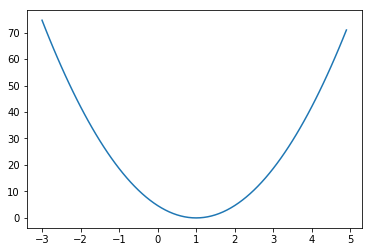

In [30]:
plt.show()

- tensorflow graph

![](./images/07/graph.png)

## Gradient descent

![](./images/07/plot.jpg)

- $ cost(w) = \frac{1}{m}\sum_{i=1}^{m}{(W(x^{(i)}-y^{(i)})^2} $

- $ W := W - \alpha\frac{1}{m}(Wx^{(i)} - y^{(i)})x^{(i)} $

- 기울기가 양수이면 Weight를 줄여야 하고
- 기울기가 음수이면 Weight를 늘여야 함
- 따라서 '-1'를 곱하여 Weight 보정

- Gradient Descent 구현

```
# Minimize: Gradient Descent using derivative
# W -= learning_rate * derivative

learning_rate = 0.1
gradient = tf.reduce_mean((W * x - y) * x)
descent = W - learning_rate * gradient
update = W.assing(descent)
```

- update는 node이며
  - session.run(update) 로 수행


![](./images/07/descent1.jpg)

- Gradient
![](./images/07/descent2.jpg)

- descent
![](./images/07/descent3.jpg)

- assign
![](./images/07/descent4.jpg)

![](./images/07/graph2.jpg)

In [34]:
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = W * X
cost = tf.reduce_mean(tf.square(hypothesis - Y))

learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X:x_data, Y:y_data})
    print(step, sess.run(cost, {X:x_data, Y:y_data}), sess.run(W))
    



0 7.32667 [-0.25299668]
1 2.08403 [ 0.33173513]
2 0.592791 [ 0.64359212]
3 0.168616 [ 0.80991578]
4 0.0479619 [ 0.89862174]
5 0.0136425 [ 0.94593161]
6 0.00388053 [ 0.97116351]
7 0.0011038 [ 0.98462051]
8 0.000313969 [ 0.99179763]
9 8.93086e-05 [ 0.99562538]
10 2.54021e-05 [ 0.9976669]
11 7.22539e-06 [ 0.99875569]
12 2.05511e-06 [ 0.99933636]
13 5.84669e-07 [ 0.99964607]
14 1.66266e-07 [ 0.99981123]
15 4.73082e-08 [ 0.99989933]
16 1.34655e-08 [ 0.9999463]
17 3.81988e-09 [ 0.99997139]
18 1.08654e-09 [ 0.99998474]
19 3.12152e-10 [ 0.99999183]
20 8.88711e-11 [ 0.99999565]


## Tensorflow의 GradientDescentOptimizer 적용

- Descent Gradient Algolithm의 자체 구현 코드

```
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)
```

- Tensorflow 제공 알고리듬

```
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(train)
```

- 미분이 필요 없음

In [41]:
import tensorflow as tf

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]))
# W = tf.Variable(5.0)
hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(20):
  print(step, sess.run(W), sess.run(train))

0 [-0.44677353] None
1 [ 0.90354848] None
2 [ 0.99356991] None
3 [ 0.99957132] None
4 [ 0.99997145] None
5 [ 0.99999809] None
6 [ 0.99999988] None
7 [ 1.] None
8 [ 1.] None
9 [ 1.] None
10 [ 1.] None
11 [ 1.] None
12 [ 1.] None
13 [ 1.] None
14 [ 1.] None
15 [ 1.] None
16 [ 1.] None
17 [ 1.] None
18 [ 1.] None
19 [ 1.] None


### Output when W=5.0

In [42]:
import tensorflow as tf

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(5.0)

hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(20):
  print(step, sess.run(W), sess.run(train))

0 5.0 None
1 1.26667 None
2 1.01778 None
3 1.00119 None
4 1.00008 None
5 1.00001 None
6 1.0 None
7 1.0 None
8 1.0 None
9 1.0 None
10 1.0 None
11 1.0 None
12 1.0 None
13 1.0 None
14 1.0 None
15 1.0 None
16 1.0 None
17 1.0 None
18 1.0 None
19 1.0 None


### Output when W=-3.0

In [43]:
import tensorflow as tf

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.Variable(-3.0)

hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(20):
  print(step, sess.run(W), sess.run(train))

0 -3.0 None
1 0.733334 None
2 0.982222 None
3 0.998815 None
4 0.999921 None
5 0.999995 None
6 1.0 None
7 1.0 None
8 1.0 None
9 1.0 None
10 1.0 None
11 1.0 None
12 1.0 None
13 1.0 None
14 1.0 None
15 1.0 None
16 1.0 None
17 1.0 None
18 1.0 None
19 1.0 None


## Optional: compute_gradient & apply_gradient

- Gradient를 조정하고자 할 때 사용

In [56]:
import tensorflow as tf

X = [1, 2, 3]
Y = [1, 2, 3]
W = tf.Variable(5.)

hypothesis = W * X
gradient = tf.reduce_mean((W * X - Y) * X) * 2
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
gvs = optimizer.compute_gradients(cost)
apply_gradients = optimizer.apply_gradients(gvs)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(20):
    print(step, sess.run(gradient), sess.run(W))
    # print(step, sess.run([gradient, W, gvs])
    sess.run(apply_gradients)

0 37.3333 5.0
1 2.48889 1.26667
2 0.165926 1.01778
3 0.0110617 1.00119
4 0.000737429 1.00008
5 4.89553e-05 1.00001
6 3.09944e-06 1.0
7 0.0 1.0
8 0.0 1.0
9 0.0 1.0
10 0.0 1.0
11 0.0 1.0
12 0.0 1.0
13 0.0 1.0
14 0.0 1.0
15 0.0 1.0
16 0.0 1.0
17 0.0 1.0
18 0.0 1.0
19 0.0 1.0


## last update

In [57]:
import datetime
print(datetime.datetime.now())

2017-05-30 07:44:20.228323
